In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
# Load necessary libraries
library(randomForest)
library(caret)
library(ggplot2)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [2]:
# Load the dataset
df <- read.csv("/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv")

# View the first few rows of the dataset
head(df)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0,0,0,6259559
2,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0,0,0,6183645
3,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0,0,0,6987759
4,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0,0,0,7602960
5,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0,0,0,7158964
6,15-05-2020 00:00,4135001,VHMLBKoKgIrUVDU,0,0,0,7206408


In [3]:
# Check for missing values
summary(df)

# Handle missing values by removing rows with NA
df <- na.omit(df)

# Check the data again after removing NAs
summary(df)


  DATE_TIME            PLANT_ID        SOURCE_KEY           DC_POWER    
 Length:68778       Min.   :4135001   Length:68778       Min.   :    0  
 Class :character   1st Qu.:4135001   Class :character   1st Qu.:    0  
 Mode  :character   Median :4135001   Mode  :character   Median :  429  
                    Mean   :4135001                      Mean   : 3147  
                    3rd Qu.:4135001                      3rd Qu.: 6367  
                    Max.   :4135001                      Max.   :14471  
    AC_POWER        DAILY_YIELD    TOTAL_YIELD     
 Min.   :   0.00   Min.   :   0   Min.   :6183645  
 1st Qu.:   0.00   1st Qu.:   0   1st Qu.:6512003  
 Median :  41.49   Median :2659   Median :7146685  
 Mean   : 307.80   Mean   :3296   Mean   :6978712  
 3rd Qu.: 623.62   3rd Qu.:6274   3rd Qu.:7268706  
 Max.   :1410.95   Max.   :9163   Max.   :7846821  

  DATE_TIME            PLANT_ID        SOURCE_KEY           DC_POWER    
 Length:68778       Min.   :4135001   Length:68778       Min.   :    0  
 Class :character   1st Qu.:4135001   Class :character   1st Qu.:    0  
 Mode  :character   Median :4135001   Mode  :character   Median :  429  
                    Mean   :4135001                      Mean   : 3147  
                    3rd Qu.:4135001                      3rd Qu.: 6367  
                    Max.   :4135001                      Max.   :14471  
    AC_POWER        DAILY_YIELD    TOTAL_YIELD     
 Min.   :   0.00   Min.   :   0   Min.   :6183645  
 1st Qu.:   0.00   1st Qu.:   0   1st Qu.:6512003  
 Median :  41.49   Median :2659   Median :7146685  
 Mean   : 307.80   Mean   :3296   Mean   :6978712  
 3rd Qu.: 623.62   3rd Qu.:6274   3rd Qu.:7268706  
 Max.   :1410.95   Max.   :9163   Max.   :7846821  

In [8]:
# Ensure that AC_POWER is numeric for regression
df$AC_POWER <- as.numeric(df$AC_POWER)


In [9]:
# Split the data into training and testing sets (80% training, 20% testing)
set.seed(42)
trainIndex <- createDataPartition(df$AC_POWER, p = 0.8, list = FALSE)
train <- df[trainIndex, ]
test <- df[-trainIndex, ]

# Check the size of the training and test data
dim(train)
dim(test)



[1] 55024     7

[1] 13754     7

In [10]:
# Train the Random Forest model to predict AC_POWER based on DC_POWER, DAILY_YIELD, and TOTAL_YIELD
rf_model <- randomForest(AC_POWER ~ DC_POWER + DAILY_YIELD + TOTAL_YIELD, data = train, ntree = 100)

# Print the model details
print(rf_model)



Call:
 randomForest(formula = AC_POWER ~ DC_POWER + DAILY_YIELD + TOTAL_YIELD,      data = train, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 45.06673
                    % Var explained: 99.97


In [11]:
# Make predictions on the test data
predictions <- predict(rf_model, test)



In [12]:
# Evaluate the model's performance using various metrics
mae <- mean(abs(predictions - test$AC_POWER))  # Mean Absolute Error
mse <- mean((predictions - test$AC_POWER)^2)  # Mean Squared Error
rmse <- sqrt(mse)  # Root Mean Squared Error
r_squared <- cor(predictions, test$AC_POWER)^2  # R-squared

# Print evaluation metrics
cat("Mean Absolute Error (MAE):", mae, "\n")
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("R-squared:", r_squared, "\n")



Mean Absolute Error (MAE): 2.39152 
Mean Squared Error (MSE): 32.72351 
Root Mean Squared Error (RMSE): 5.720446 
R-squared: 0.9997961 


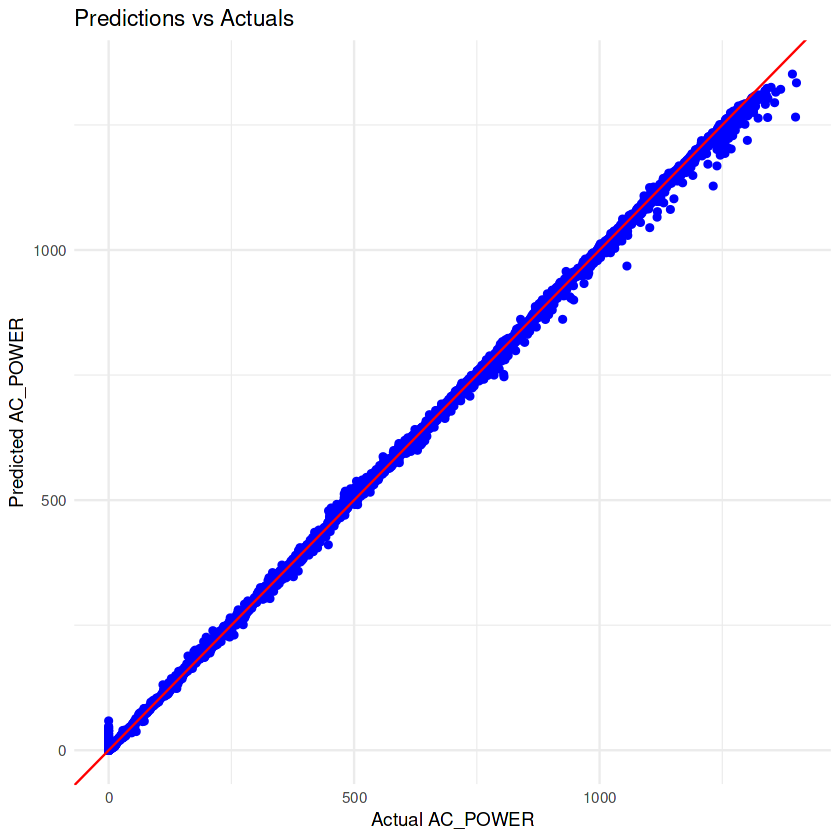

In [13]:
# Plot the predicted values vs. actual values
ggplot(data = data.frame(Actual = test$AC_POWER, Predicted = predictions), aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Predictions vs Actuals", x = "Actual AC_POWER", y = "Predicted AC_POWER") +
  theme_minimal()


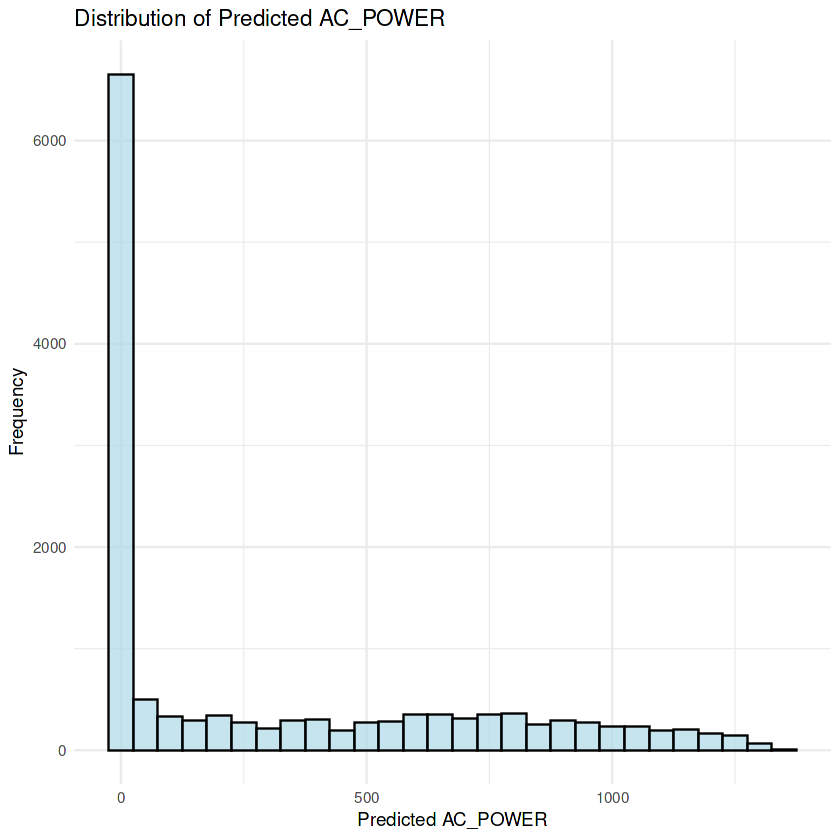

In [14]:
# Plot the distribution of predicted AC_POWER
ggplot(data = data.frame(Predicted = predictions), aes(x = Predicted)) +
  geom_histogram(binwidth = 50, fill = "lightblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Predicted AC_POWER", x = "Predicted AC_POWER", y = "Frequency") +
  theme_minimal()


In [15]:
# Evaluate the model's performance using various metrics
mae <- mean(abs(predictions - test$AC_POWER))  # Mean Absolute Error
mse <- mean((predictions - test$AC_POWER)^2)  # Mean Squared Error
rmse <- sqrt(mse)  # Root Mean Squared Error
r_squared <- cor(predictions, test$AC_POWER)^2  # R-squared

# Print evaluation metrics
cat("Mean Absolute Error (MAE):", mae, "\n")
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("R-squared:", r_squared, "\n")


Mean Absolute Error (MAE): 2.39152 
Mean Squared Error (MSE): 32.72351 
Root Mean Squared Error (RMSE): 5.720446 
R-squared: 0.9997961 


In [16]:
# Let's say we want to predict the AC_POWER for a new sample:
new_data <- data.frame(DC_POWER = 4000, DAILY_YIELD = 2500, TOTAL_YIELD = 7200000)

# Make a prediction using the trained model
new_prediction <- predict(rf_model, new_data)

# Print the predicted output
cat("Predicted AC_POWER for the new input is:", new_prediction, "\n")


Predicted AC_POWER for the new input is: 391.0349 
